<center> <h1> Gayrimenkul Değer Kontrol Sistemi Projesi(New Data)<h1/>  <h3> Author: Kazim Sanlav <h3/><center/> 


## Workflow stages

* Question or problem definition.
* Acquire training and testing data.
* Wrangle, prepare, cleanse the data.
* Analyze, identify patterns, and explore the data.
* Model, predict and solve the problem.
* Visualize, report, and present the problem solving steps and final solution.


## Question and problem definition


Aim of our project is creating a system for predicting real estate prices for the use by valuation agencies, banks or government.  
We will use only *KONUT* type real estate

## Workflow goals


The data science solutions workflow solves for seven major goals.

**Classifying** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.  
**Correlating** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.  
**Converting** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.  
**Completing** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.  
**Correcting** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.  
**Creating** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.  
**Charting** How to select the right visualization plots and charts depending on nature of the data and the solution goals.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn import preprocessing
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Accure Data
fileName = 'C:/Users/kazIm/Desktop/projects/IE490/input/tubitak_veri_duzenli.xlsx'

In [3]:
# from google.colab import files

# uploaded = files.upload()


In [4]:
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [0]:
# !pip install -q xlrd

In [6]:
df = pd.read_excel(fileName)

In [7]:
# df = pd.read_csv(fileName, encoding = "ISO-8859-9", sep = ';')#all fileds 

In [21]:
#preview data
df.head()


,il,ilce,mahalle,yuzolcumu,bagimsiz_bolum_kat,mevcut_alani,adil_piyasa_degeri_mevcutdurumdegeri,konutun_yasi
0,ANKARA,YENİMAHALLE,YUVA MAHALLESİ,7280.00,6,130.0,125000,16
1,ÇANAKKALE,GELİBOLU,HOCA HAMZA MAHALLESİ,1255.60,1,128.0,240000,4
2,ADANA,SEYHAN,KURTULUŞ,5065.00,1,123.0,110000,27
3,ANTALYA,SERİK,nan,3727.00,1,80.0,95000,25
4,TEKİRDAĞ,MALKARA,HACIEVHAT MAHALLESİ,716.22,1,106.0,96000,4


Lets look at the type of field, we will select konut type rows only;  
We need to correct this field by selecting only first word in each row of this column  
Then only include the *KONUT* ones

**Which features contain blank, null or empty values?**  
* These will require correcting.  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 9 columns):
rapor_tanzim_tarihi                     8982 non-null object
il                                      8982 non-null object
ilce                                    8982 non-null object
mahalle                                 7725 non-null object
yuzolcumu                               8982 non-null object
bagimsiz_bolum_kat                      8982 non-null int64
konutun_yapim_yili                      8982 non-null int64
mevcut_alani                            8982 non-null float64
adil_piyasa_degeri_mevcutdurumdegeri    8982 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 631.6+ KB


**NA percentages of columns**

In [11]:
df.isnull().sum()/len(df)*100

rapor_tanzim_tarihi                      0.000000
il                                       0.000000
ilce                                     0.000000
mahalle                                 13.994656
yuzolcumu                                0.000000
bagimsiz_bolum_kat                       0.000000
konutun_yapim_yili                       0.000000
mevcut_alani                             0.000000
adil_piyasa_degeri_mevcutdurumdegeri     0.000000
dtype: float64

Columns  
* *mahalle* has **13.9%**
* other columns have no missing values!

We may just drop this columns as we cannot guess mahalles



** What is the distribution of numerical feature values across the samples?**

In [12]:
df.describe()

,bagimsiz_bolum_kat,konutun_yapim_yili,mevcut_alani,adil_piyasa_degeri_mevcutdurumdegeri
count,8982.000000,8982.000000,8982.000000,8.982000e+03
mean,3.856045,2004.247050,147.691141,2.058482e+05
std,3.094274,9.191506,1593.608478,1.949140e+06
min,1.000000,1944.000000,25.000000,1.600000e+04
25%,2.000000,1998.000000,100.000000,1.000000e+05
50%,3.000000,2008.000000,123.000000,1.330000e+05
75%,5.000000,2011.000000,148.000000,1.800000e+05
max,29.000000,2015.000000,150000.000000,1.433439e+08


**What is the distribution of categorical features?**

In [13]:
df.describe(include=['O'])

,rapor_tanzim_tarihi,il,ilce,mahalle,yuzolcumu
count,8982,8982,8982,7725,8982
unique,8079,84,386,1400,6264
top,2014-06-11 17:30:00,İSTANBUL,MERKEZ,KAYAPINAR MAHALLESİ,5990
freq,24,1157,1944,364,24


## Lets look closer to categorical values

### *Variable: il*

In [9]:
df['il'].unique()

array(['ANKARA', 'ÇANAKKALE', 'ADANA ', 'ANTALYA', 'TEKİRDAĞ', 'BURSA',
       'KÜTAHYA', 'İSTANBUL', 'KOCAELİ', 'BALIKESİR', 'MERSİN ',
       'AFYONKARAHİSAR', 'KAYSERİ', 'DİYARBAKIR', 'KIRKLARELİ',
       'ESKİŞEHİR', 'NİĞDE', 'GAZİANTEP', 'İZMİR', 'ADIYAMAN', 'ADANA',
       'KONYA', 'KASTAMONU', 'YALOVA', 'KIRIKKALE', 'MANİSA', 'DENİZLİ',
       'HATAY ', 'ADIYAMAN ', 'TOKAT', 'GAZİANTEP ', 'BURDUR',
       'OSMANİYE ', 'ÇORUM', 'MUĞLA', 'ELAZIĞ', 'MERSİN', 'ORDU',
       'ŞANLIURFA', 'AYDIN', 'TRABZON', 'SAMSUN', 'MALATYA', 'RİZE',
       'ARTVİN', 'EDİRNE', 'OSMANİYE', 'GİRESUN', 'NİĞDE ', 'BOLU',
       'ŞANLIURFA ', 'MARDİN', 'KIRŞEHİR', 'DÜZCE', 'ÇANKIRI', 'ISPARTA',
       'SAKARYA', 'BATMAN', 'AMASYA', 'YOZGAT', 'TUNCELİ', 'VAN', 'SİİRT',
       'BİNGÖL', 'UŞAK', 'HAKKARİ', 'KİLİS', 'HATAY', 'MUŞ',
       'KAHRAMANMARAŞ ', 'AĞRI', 'KAHRAMANMARAŞ', 'KARS', 'BİTLİS',
       'IĞDIR', 'BARTIN', 'ŞIRNAK', ' HATAY', 'BİLECİK', 'SİNOP',
       'ERZURUM', 'ZONGULDAK', 'ERZİNCAN', '

In [0]:
df.ilce = df.ilce.apply(str)

In [11]:
df['ilce'].unique()

array(['YENİMAHALLE', 'GELİBOLU', 'SEYHAN ', 'SERİK', 'MALKARA',
       'NİLÜFER', 'MAMAK', 'MERKEZ', 'BÜYÜKÇEKMECE', 'KARTEPE', 'AYVALIK',
       'YENİŞEHİR ', 'KADIKÖY', 'BAĞCILAR', 'PURSAKLAR', 'ÜMRANİYE',
       'KEPEZ', 'KOCASİNAN', 'ÇANKAYA', 'BAŞAKŞEHİR', 'ETİMESGUT',
       'ÇORLU', 'KAYAPINAR', 'LÜLEBURGAZ', 'ODUNPAZARI', 'BEŞİKTAŞ',
       'SİNCAN', 'İZMİT', 'ŞAHİNBEY ', 'KARABAĞLAR', 'MUSTAFAKEMALPAŞA',
       'MURATPAŞA', 'PENDİK', 'GEBZE', 'TEPEBAŞI', 'YENİŞEHİR',
       'SEYDİŞEHİR', 'EYÜP', 'EREĞLİ', 'ÇİĞLİ', 'BAKIRKÖY', 'MELİKGAZİ',
       'ESENYURT', 'KARŞIYAKA', 'SANCAKTEPE', 'TALAS', 'BUCA', 'ÇINARCIK',
       'GÖLBAŞI', 'TURGUTLU', 'DERİNCE', 'ÇATALCA', 'MENDERES', 'KARTAL',
       'KÜÇÜKÇEKMECE', 'ERDEMLİ ', 'ALTINDAĞ', 'YILDIRIM', 'SELÇUKLU',
       'KONYAALTI', 'ÜSKÜDAR', 'BAHÇELİEVLER', 'BEYLİKDÜZÜ', 'ERGANİ',
       'YÜREĞİR', 'OSMANGAZİ', 'FOÇA', 'ÇEKMEKÖY', 'TORBALI', 'ÇUKUROVA ',
       'DÖRTYOL ', 'GÖLMARMARA', 'BORNOVA', 'ŞAHİNBEY', 'ELMADAĞ',
       'BİSM

**There is a typo, we will get ride of it**

In [10]:
df = df[df['ilce'] != '2018-02-12 00:00:00']

In [11]:
df.mahalle = df.mahalle.apply(str)

In [14]:
df['mahalle'].unique()

array(['YUVA MAHALLESİ', 'HOCA HAMZA MAHALLESİ', 'KURTULUŞ ', ...,
       'BAHÇELER MAHALLESİ', 'BARBAROS', 'ŞEHİTİSHAK'], dtype=object)

### *Variable: bagimsiz_bolum_kat*

In [15]:
(df['bagimsiz_bolum_kat'].value_counts()/len(df)).head(10)

1     0.216195
2     0.196258
3     0.169080
4     0.128982
5     0.077077
6     0.056471
7     0.041435
8     0.029739
9     0.023279
10    0.017933
Name: bagimsiz_bolum_kat, dtype: float64

### *Other Variables*

`yuzolcumu` appears as a categorical variable, we will convert it into continious integer variable 

In [12]:
df.yuzolcumu = pd.to_numeric(df.yuzolcumu, errors='coerce',downcast='integer')

We do not think that `rapor_tanzim_tarihi` has any affect on the value, in the presence of the variable `konutun_yapim_yili`

In [13]:
df = df.drop('rapor_tanzim_tarihi',axis=1)

We also created a new column `konutun_yasi` and we will replace it with `konutun_yapim_yili`

In [14]:
df['konutun_yasi'] = 2015 - df['konutun_yapim_yili']

In [15]:
df.konutun_yasi.describe()

count    8982.000000
mean       10.752950
std         9.191506
min         0.000000
25%         4.000000
50%         7.000000
75%        17.000000
max        71.000000
Name: konutun_yasi, dtype: float64

In [16]:
df = df.drop('konutun_yapim_yili',axis=1)

We will drop the NA containing columns

In [17]:
#dropping NAN rows
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8822 entries, 0 to 8981
Data columns (total 8 columns):
il                                      8822 non-null object
ilce                                    8822 non-null object
mahalle                                 8822 non-null object
yuzolcumu                               8822 non-null float64
bagimsiz_bolum_kat                      8822 non-null int64
mevcut_alani                            8822 non-null float64
adil_piyasa_degeri_mevcutdurumdegeri    8822 non-null int64
konutun_yasi                            8822 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 620.3+ KB


In [19]:
df.shape

(8822, 8)

### Remove mahalles that has sample size less than 50

In [0]:
# mahalles = df.mahalle_kod.value_counts()
# selected = mahalles[mahalles>=50]
# sel_values = selected.index
# sel_values
# df = df.loc[df['mahalle_kod'].isin(sel_values)]

In [0]:
# df.shape

In [0]:
# df.to_csv(index=False,header=True,path_or_buf='C:/Users/kazIm/Desktop/projects/IE490/input/tubitak_data2_processesed.csv')

## Selecting only 79. ilce 

In [0]:
# # df.ilce_kod.value_counts()

# df.drop(df.index[df.ilce_kod!=79],inplace=True)
# # df
# df.drop('ilce_kod',axis=1,inplace=True)

In [0]:
# # df["ilce_kod"] = df["ilce_kod"].astype('category')
# df["mahalle_kod"] = df["mahalle_kod"].astype('category')

In [0]:
# df.info()

In [0]:
# df.describe()

In [0]:
# df['ilce_kod'].describe()

In [0]:
# df['mahalle_kod'].describe()

## Assumtions based on data analysis


We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.  

**Correlating**  
* We want to know how well does each feature correlate with *adil_piyasa_degeri_mevcutdurumdegeri*. We want to do this early in our project and match these quick correlations with modelled correlations later in the project. 

**Correcting** 
* *tapu_tarihi* will be dropped
* *mahalle* -> categorical
* *ilce* -> categorical
* *il* -> categorical

**Creating**  
* *yil* should merged to *age* column 


### Analysing price

In [22]:
#descriptive statistics summary
df['adil_piyasa_degeri_mevcutdurumdegeri'].describe()


count    8.822000e+03
mean     2.065010e+05
std      1.966695e+06
min      1.600000e+04
25%      1.000000e+05
50%      1.300000e+05
75%      1.800000e+05
max      1.433439e+08
Name: adil_piyasa_degeri_mevcutdurumdegeri, dtype: float64

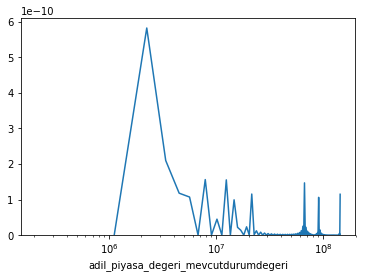

In [23]:
#histogram
ax=sns.distplot(df['adil_piyasa_degeri_mevcutdurumdegeri'],hist=False)
# Set the `xscale`
ax.set(xscale="log");

* Deviate from the normal distribution.
* Have positive skewness.

In [40]:
#skewness
print("The skewness of adil_piyasa_degeri_mevcutdurumdegeri is {}".format(df['adil_piyasa_degeri_mevcutdurumdegeri'].skew()))

The skewness of adil_piyasa_degeri_mevcutdurumdegeri is 59.11983309223825


Skewness is 1.8076726862593104


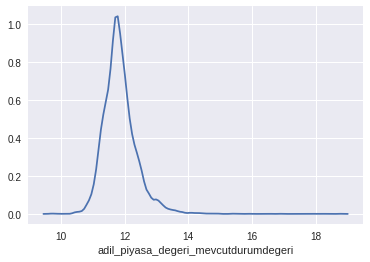

In [41]:
#now  the target variable
target = np.log(df['adil_piyasa_degeri_mevcutdurumdegeri'])
print('Skewness is', target.skew())
sns.distplot(target,hist=False)


** Should we take the log of the predicted variable before using in ML algorithms?**

## Corelations with adil_piyasa_degeri_mevcutdurumdegeri

### Relationship with numerical variables

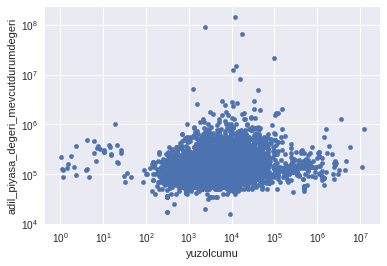

In [42]:
#scatter plot yuzolcumu
var = 'yuzolcumu'
data = pd.concat([df['adil_piyasa_degeri_mevcutdurumdegeri'], df[var]], axis=1)
data.plot.scatter(x=var, y='adil_piyasa_degeri_mevcutdurumdegeri', logx = True, logy = True);

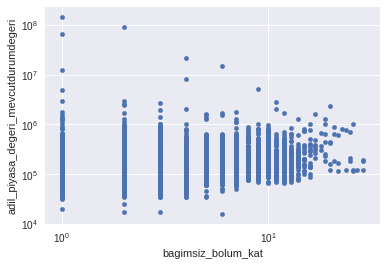

In [43]:
#scatter plot bagimsiz_bolum_kat
var = 'bagimsiz_bolum_kat'
data = pd.concat([df['adil_piyasa_degeri_mevcutdurumdegeri'], df[var]], axis=1)
data.plot.scatter(x=var, y='adil_piyasa_degeri_mevcutdurumdegeri', logx = True, logy = True);

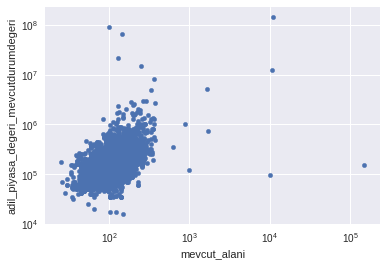

In [44]:
#scatter plot mevcut_alani
var = 'mevcut_alani'
data = pd.concat([df['adil_piyasa_degeri_mevcutdurumdegeri'], df[var]], axis=1)
data.plot.scatter(x=var, y='adil_piyasa_degeri_mevcutdurumdegeri', logx = True, logy = True);

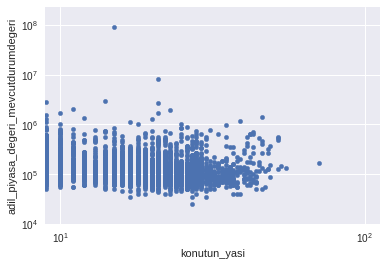

In [45]:
#scatter plot konutun_yasi
var = 'konutun_yasi'
data = pd.concat([df['adil_piyasa_degeri_mevcutdurumdegeri'], df[var]], axis=1)
data.plot.scatter(x=var, y='adil_piyasa_degeri_mevcutdurumdegeri', logx = True, logy = True);

### Relationship with categorical variables

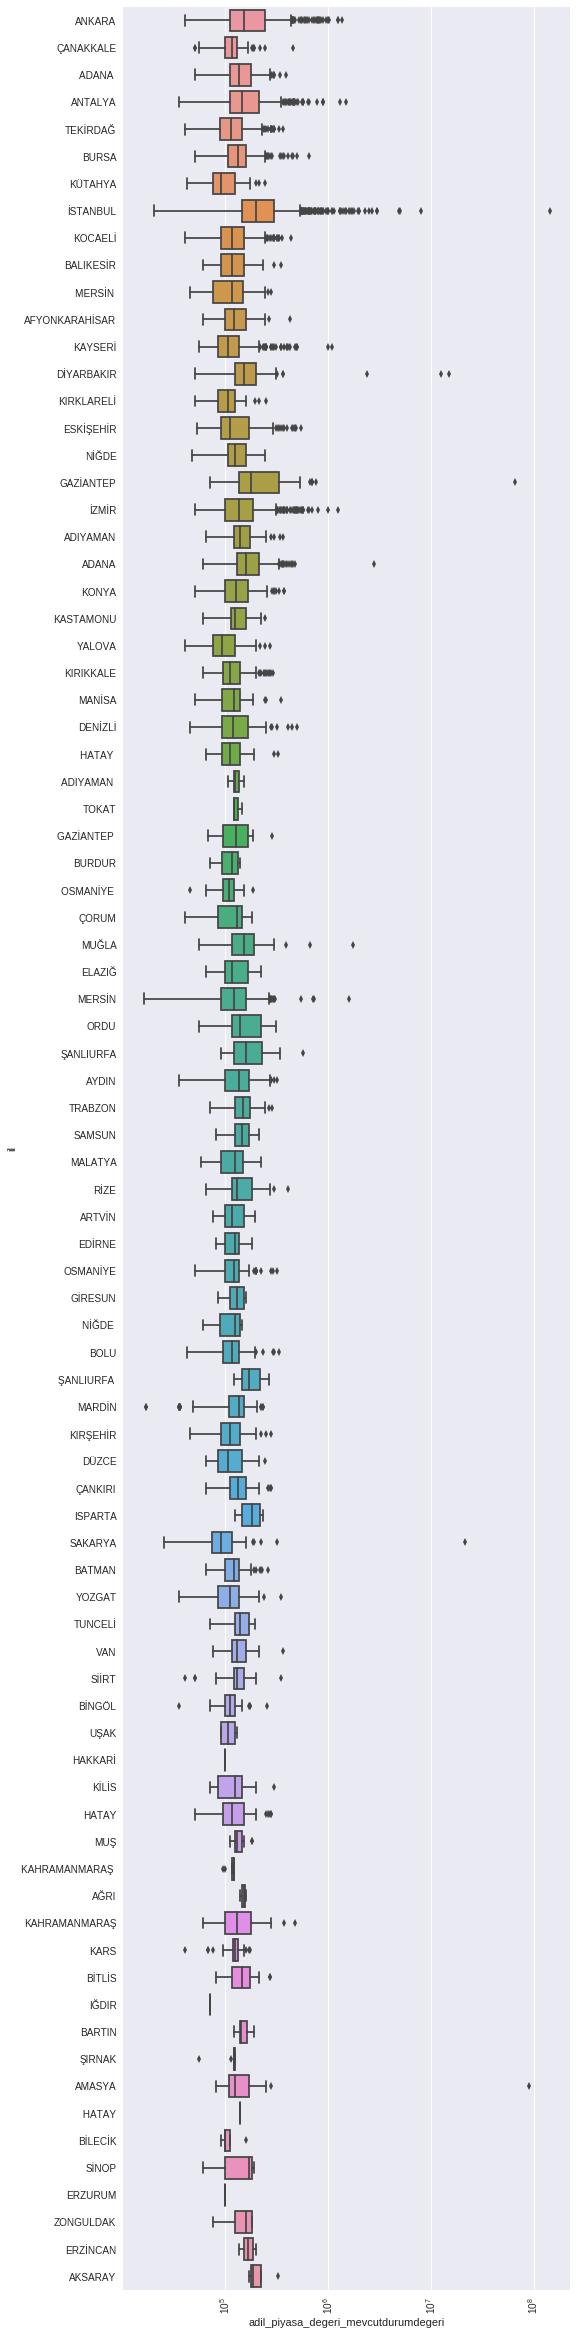

In [46]:
#box plot il/adil_piyasa_degeri_mevcutdurumdegeri

var = 'il'
length = (df[var].unique().shape[0]/2)
data = pd.concat([df['adil_piyasa_degeri_mevcutdurumdegeri'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,length))
fig = sns.boxplot(y=var, x="adil_piyasa_degeri_mevcutdurumdegeri",orient="h", data=data)
fig.set(xscale="log")
plt.xticks(rotation=90);

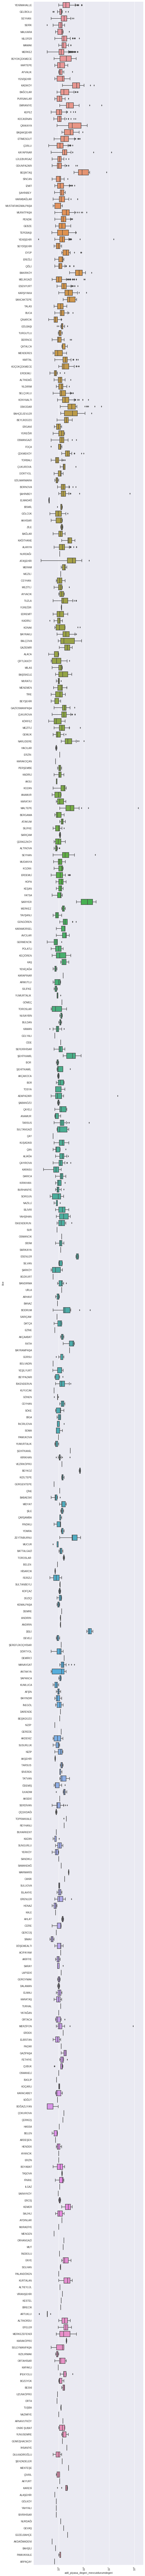

In [47]:
#box plot ilce/adil_piyasa_degeri_mevcutdurumdegeri

var = 'ilce'
length = (df[var].unique().shape[0]/2)
data = pd.concat([df['adil_piyasa_degeri_mevcutdurumdegeri'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,length))
fig = sns.boxplot(y=var, x="adil_piyasa_degeri_mevcutdurumdegeri",orient="h", data=data)
fig.set(xscale="log")
plt.xticks(rotation=90);

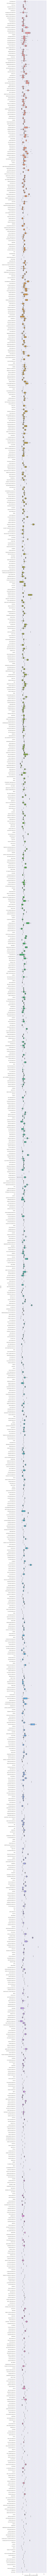

In [72]:
#box plot mahalle/adil_piyasa_degeri_mevcutdurumdegeri

var = 'mahalle'
length = (df[var].unique().shape[0]/2)
data = pd.concat([df['adil_piyasa_degeri_mevcutdurumdegeri'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,length))
fig = sns.boxplot(y=var, x="adil_piyasa_degeri_mevcutdurumdegeri",orient="h", data=data)
fig.set(xscale="log")
plt.xticks(rotation=90);

### Correlation matrix (heatmap)


In [0]:
# #correlation matrix
# corrmat = df.corr()
# f, ax = plt.subplots(figsize=(8,8))
# sns.heatmap(corrmat, vmax=.8, square=True);

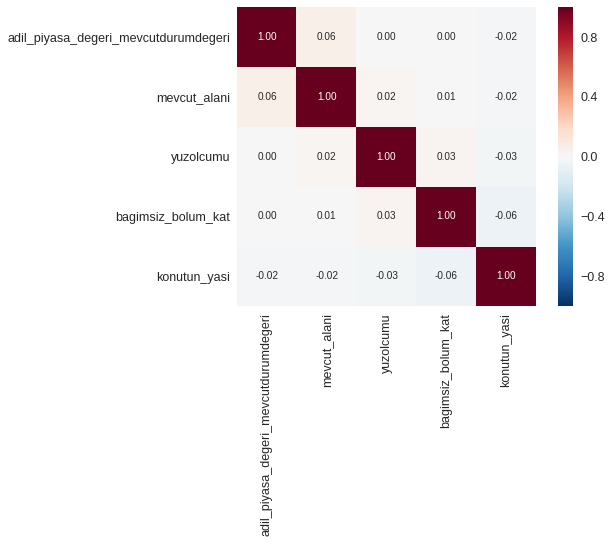

In [51]:
#adil_piyasa_degeri_yasal_durum correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'adil_piyasa_degeri_mevcutdurumdegeri')['adil_piyasa_degeri_mevcutdurumdegeri'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

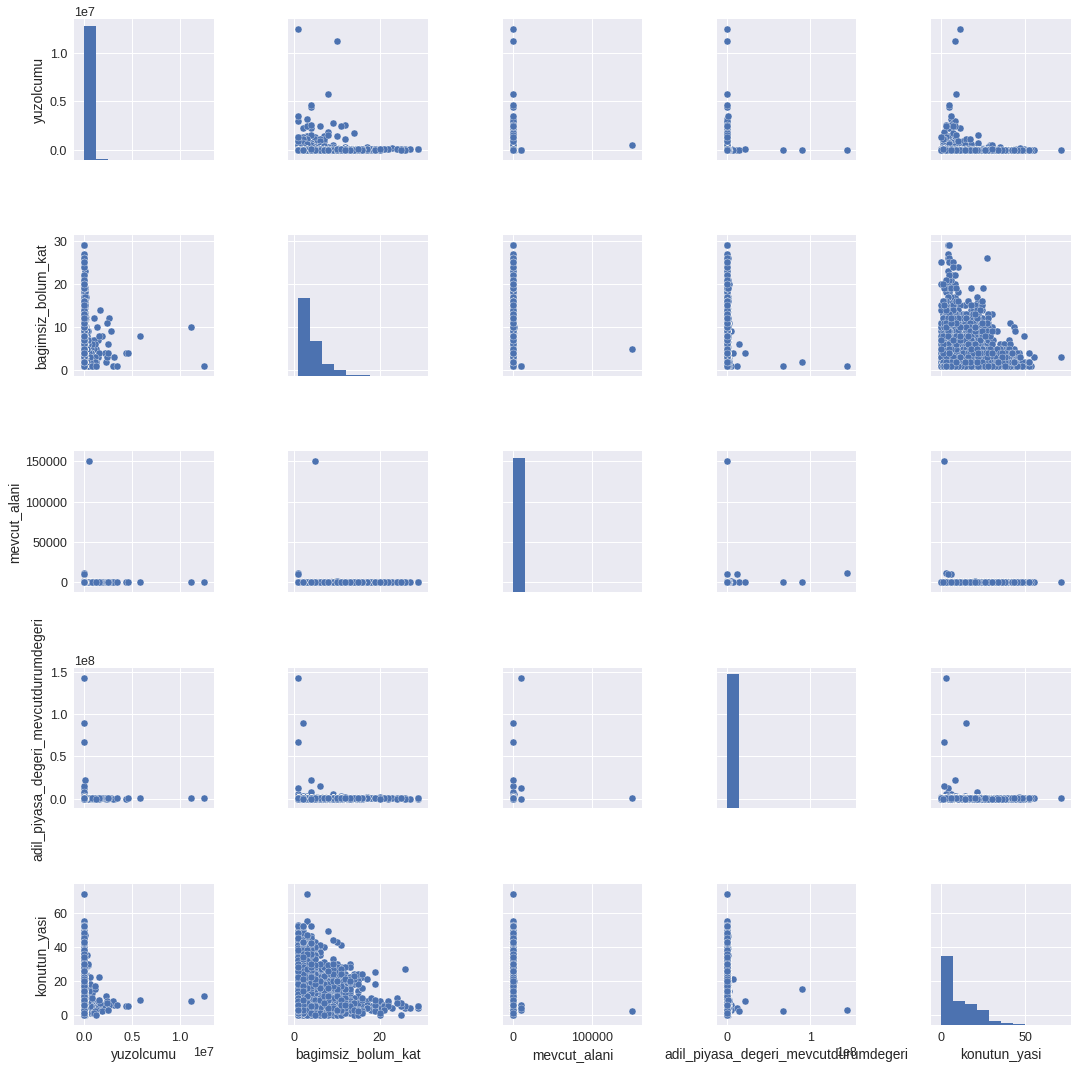

In [57]:
# #scatterplot
fig = sns.pairplot(df, size = 3)
# fig.set(xscale="log")
# fig.set(yscale="log")
plt.show();

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

outer range (low) of the distribution:
[[-0.09684919]
 [-0.09634078]
 [-0.09634078]
 [-0.09481555]
 [-0.0922735 ]
 [-0.08871463]
 [-0.0871894 ]
 [-0.0871894 ]
 [-0.0871894 ]
 [-0.0871894 ]]

outer range (high) of the distribution:
[[ 1.4202468 ]
 [ 2.38622615]
 [ 2.44469332]
 [ 3.96229772]
 [ 6.28064817]
 [ 7.59743055]
 [10.94276956]
 [33.80823903]
 [45.6519329 ]
 [72.77252006]]


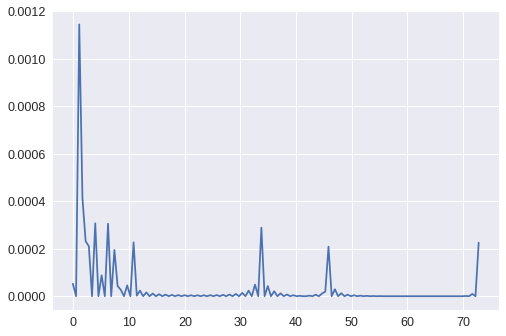

In [59]:
#standardizing data
price_scaled = preprocessing.StandardScaler().fit_transform(df['adil_piyasa_degeri_mevcutdurumdegeri'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)
sns.distplot(price_scaled,hist=False);


* Low range values are similar and not too far from 0.
* High range values are far from 0 and last value is really out of range.

In [29]:
mahalle = df['mahalle']
ilce = df['ilce']
il = df['il']

### One Hot Encoding for Categorical Variables

In [30]:
df = pd.get_dummies(df, columns=["il"])
df = pd.get_dummies(df, columns=["ilce"])
df = pd.get_dummies(df, columns=["mahalle"])

In [31]:
df.head()

,yuzolcumu,bagimsiz_bolum_kat,mevcut_alani,adil_piyasa_degeri_mevcutdurumdegeri,konutun_yasi,il_ HATAY,il_ADANA,il_ADANA,il_ADIYAMAN,il_ADIYAMAN,...,mahalle_ŞEYH ULEMARECEPAĞA MAHALLESİ,mahalle_ŞEYHCUİ MAHALLESİ,mahalle_ŞEYHLİ MAHALLESİ,mahalle_ŞEYHSİNAN MAHALLESİ,mahalle_ŞIH ABDULLAH MAHALLESİ,mahalle_ŞIHABDULLAH,mahalle_ŞİLBE MAHALLESİ,mahalle_ŞİRİNKÖY MAHALLESİ,mahalle_ŞİRİNTEPE MAHALLESİ,mahalle_ŞİRİNYALI MAHALLESİ
0,7280.00,6,130.0,125000,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1255.60,1,128.0,240000,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5065.00,1,123.0,110000,27,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3727.00,1,80.0,95000,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,716.22,1,106.0,96000,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Training and Evaulation

### 1. Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [32]:
X = df.drop('adil_piyasa_degeri_mevcutdurumdegeri',axis=1)
y = df['adil_piyasa_degeri_mevcutdurumdegeri']

In [33]:
RANDOM_STATE = 42

In [34]:
from sklearn.ensemble import RandomForestRegressor


# regr = RandomForestRegressor(bootstrap=True,
#                              oob_score=True,
#                              max_depth = 40,
#                              max_features = 4,
#                              min_samples_leaf = 1,
#                              min_samples_split = 2,
#                              n_estimators = 300,
#                              random_state = RANDOM_STATE)
# rf = regr.fit(X, y)


### Cross Validation for Parameter Optimization

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = RANDOM_STATE,oob_score=True)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=RANDOM_STATE, n_jobs=-1,                             
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, y);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [0]:
rf_random.best_params_
print(feature importance)
#print(regr.feature_importances_)

In [0]:
best_random = rf_random.best_estimator_

**We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.**

In [0]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2,3],
    'n_estimators': [100, 200, 300]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42,oob_score=True)
rf.fit(X,y)
 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 2, return_train_score=True)

In [0]:
# Fit the grid search to the data
grid_search.fit(X, y);

In [0]:
grid_search.best_params_

In [0]:
best_grid = grid_search.best_estimator_

In [0]:
preds = best_grid.oob_prediction_
preds = rf.oob_prediction_
df['prediction'] = preds
df['error'] = np.abs(df['adil_piyasa_degeri_yasal_durum']-df['prediction'])/df['adil_piyasa_degeri_yasal_durum']

In [0]:
df.head()

Returns the coefficient of determination R^2 of the prediction.
The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred)^2).sum() and v is the total sum of squares ((y_true - y_true.mean())^2).sum(). The best possible score is 1.0 

In [0]:
# print(":",regr.oob_score_)
# oob_error = 1 - best_grid.oob_score_
oob_error = 1 - rf.oob_score_
print("oob error:",oob_error)
print("R^2:",rf.score(X, y, sample_weight=None))


In [0]:
df.error.describe()

In [0]:
#histogram
ax=sns.distplot(df['error'],hist=False)
# ax.set(xscale='log');

In [0]:
sd_error = np.std(df.error)
mean_error = np.mean(df.error)
print("Mean of Error:",mean_error,"Standard Deviation of Error:", sd_error)

In [0]:
#scatter plot predictions
var = 'prediction'
data = pd.concat([df['adil_piyasa_degeri_yasal_durum'], df[var]], axis=1)
data.plot.scatter(x=var, y='adil_piyasa_degeri_yasal_durum', logx=True, logy=True);

### Rate of houses that have less than 20% prediction error  

In [0]:
(df[df.error<=0.2].shape[0])/df.shape[0]

** 86.1% of the houses contain less than 20% error rate.**

In [0]:

result = pd.concat([df['error'], mahalle], axis=1)


In [0]:
result.sample(5)

In [0]:
result.sort_values(by='error', ascending=False)[:10]


### Absolute Error Statistics for Each District

In [0]:
mahalle.unique()

In [0]:
grouped = result.groupby(['mahalle_kod'])
stats = grouped.describe()

In [0]:
stats

### Rate of Districts' that Contain Max 25% error 

In [0]:
a = grouped.agg([np.mean])
a.dropna(axis=0,inplace=True,how='any')
a

In [0]:
b = a[a<=0.25]
b.dropna(axis=0,inplace=True,how='any')
b

In [0]:
b.shape[0]/a.shape[0]

** 75% of the districts contain less than 25% error rates on average.**

In [0]:
X.head()